In [125]:
import gpuRIR
import os
import random
import numpy as np
import math
import pandas as pd
import math
import matplotlib.pyplot as plt

room size: 7.723042378791135 7.863221861962505 4.822525037687895
mic position: 3.8615211893955674 3.9316109309812526 2.4112625188439476
src distance: 1.4782686075401874
pos1_angle: 1.4311699866353502
pos2_angle: -1.53588974175501


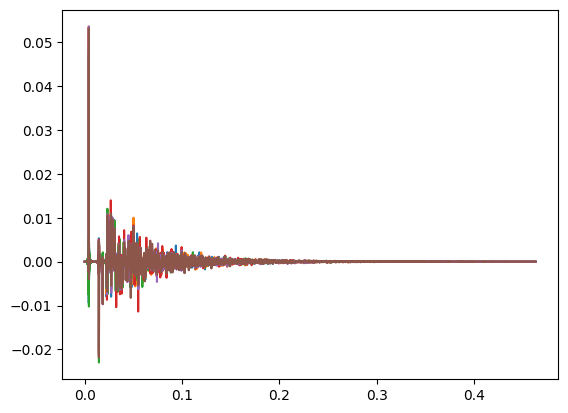

In [126]:
# fixed src, fixed rcv
fs = 16000
nb_src = 2
nb_rcv = 3

# Room
x = random.uniform(6.0,10.0)
y = random.uniform(6.0, 8.0)
z = random.uniform(2.5,6.0)
room_sz = [x, y, z]  

# microphone distance of the fixed-array
distance = 0.04

# receivers
x_rcv, y_rcv, z_rcv = x/2, y/2, z/2
pos_rcv = np.array([[x_rcv-distance, y_rcv, z_rcv ], [x_rcv, y_rcv, z_rcv], [x_rcv+distance, y_rcv, z_rcv]])

# sources
src_dist = random.uniform(1.0,2.0)
pos1_angle = np.deg2rad(random.choice(np.arange(-90,90,1)))
pos2_angle = np.deg2rad(random.choice(np.arange(-90,90,1)))
pos_src1 = [x_rcv + src_dist*math.cos(pos1_angle), y_rcv + src_dist*math.sin(pos1_angle), z_rcv]
pos_src2 = [x_rcv + src_dist*math.cos(pos2_angle), y_rcv + src_dist*math.sin(pos2_angle), z_rcv]
pos_src = np.array([pos_src1, pos_src2])

print('room size:', x, y, z)
print('mic position:', x_rcv, y_rcv, z_rcv)
print('src distance:', src_dist)
print('pos1_angle:', pos1_angle)
print('pos2_angle:', pos2_angle)

# config etc
t60 = random.uniform(0.2,1.3)
att_diff = 15.0	
att_max = 60.0 

Tdiff= gpuRIR.att2t_SabineEstimator(att_diff, t60) 
Tmax = gpuRIR.att2t_SabineEstimator(att_max, t60)	

beta = gpuRIR.beta_SabineEstimation(room_sz, t60)
nb_img = gpuRIR.t2n(t60, room_sz)
RIRs = gpuRIR.simulateRIR(room_sz, beta, pos_src, pos_rcv, nb_img, t60, fs)

t = np.arange(int(math.ceil(Tmax * fs))) / fs
plt.plot(t, RIRs.reshape(nb_src*nb_rcv, -1).transpose())
plt.show()
